<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Radial_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Setup

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from IPython.display import display

In [0]:
#@title Solver
def solve(x1, y1, x2, y2, x3, y3):
  y0 = (y1 + y2 - (((x3 - x1) * (x3 - x2))/(y3 - y1) - y2 + y3)/(((x3 - x1) * (y2 - y1))/((x2 - x1) * (y3 - y1)) - 1)) / 2
  x0 = ((y2 - y1) * (y2 + y1 - 2 * y0)/(x2 - x1) + x1 + x2) / 2
  r = ((x1 - x0) ** 2 + (y1 - y0) ** 2) ** 0.5

  return x0, y0, r

You entered:


,x,y
0,0,2
1,3,4
2,11,110


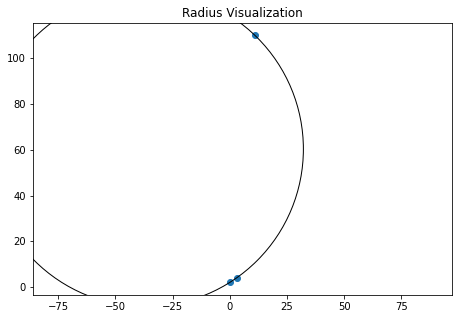

Results:
- Center of circle: (-36.6987, 60.2980)
- Radius: 68.8872


In [27]:
#@title { run: "auto" }

#@markdown Enter your 3 points:

x1 = 0 #@param { type: "number" }
y1 =  2#@param { type: "number" }
#@markdown ---
x2 =  3#@param { type: "number" }
y2 =  4#@param { type: "number" }
#@markdown ---
x3 =  11#@param { type: "number" }
y3 =  110#@param { type: "number" }

points = np.array([(x1, y1), (x2, y2), (x3, y3)])

points_df = pd.DataFrame(points)
points_df.columns = ["x", "y"]

print("You entered:")

display(points_df)

# Solve for circle.

x0, y0, r = solve(x1, y1, x2, y2, x3, y3)
circle = plt.Circle((x0, y0), r, fill=False)

scaling = 7.5, 5
fig, ax = plt.subplots(figsize=scaling, facecolor="white")

ax.set_title("Radius Visualization")

ax.add_artist(circle)
ax.scatter(points_df["x"], points_df["y"])

ax.axis("equal") # Equal aspect ratio ensures that curve is drawn as a semicircle.

plt.show()

print("Results:")
print(f"- Center of circle: ({x0:.4f}, {y0:.4f})")
print(f"- Radius: {r:.4f}")

# Solving the curve

$(x_1 - x_0)^2 + (y_1 - y_0)^2 = r^2$

$(x_2 - x_0)^2 + (y_2 - y_0)^2 = r^2$

$(x_3 - x_0)^2 + (y_3 - y_0)^2 = r^2$

## Solving for $x_0$

$(x_1 - x_0)^2 + (y_1 - y_0)^2 = (x_2 - x_0)^2 + (y_2 - y_0)^2$

\

$(x_1 - x_0)^2 = (x_2 - x_0)^2 + (y_2 - y_0)^2 - (y_1 - y_0)^2$

\

$(x_1 - x_0)^2 - (x_2 - x_0)^2 = (y_2 - y_0)^2 - (y_1 - y_0)^2$

\

$x_1^2 - 2x_0x_1 + x_0^2 - x_2^2 + 2x_0x_2 - x_0^2 = (y_2 - y_0)^2 - (y_1 - y_0)^2$

\

$x_0[2(x_2 - x_1)] = (y_2 - y_0)^2 - (y_1 - y_0)^2 - x_1^2 + x_2^2$

\

$x_0[2(x_2 - x_1)] = (y_2 - y_0)^2 - (y_1 - y_0)^2 + (x_2 + x_1)(x_2 - x_1)$

\

$x_0 = \frac12 \left(\frac{y_2^2 - y_1^2 + 2y_0(y_1 - y_2)}{x_2 - x_1} + x_1 + x_2\right)$

\

$x_0 = \frac12 \left(\frac{(y_2 - y_1)(y_2 + y_1 - 2y_0)}{x_2 - x_1} + x_1 + x_2\right)$

## Solving for $y_0$

$(x_1 - x_0)^2 + (y_1 - y_0)^2 = (x_3 - x_0)^2 + (y_3 - y_0)^2$

\

$(y_1 - y_0)^2 - (y_3 - y_0)^2 = (x_3 - x_0)^2 - (x_1 - x_0)^2$

\

$y_1^2 - 2y_0y_1 + y_0^2 - y_3^2 + 2y_0y_3 - y_0^2 = (x_3 - x_0)^2 - (x_1 - x_0)^2$

\

$y_1^2 - y_3^2 + y_0[2(y_3 - y_1)] = (x_3 - x_0)^2 - (x_1 - x_0)^2$

\

$y_0(y_3 - y_1) = \frac12 \left[ (x_3 - x_0)^2 - (x_1 - x_0)^2 + y_3^2 - y_1^2 \right]$

\

$y_0(y_3 - y_1) = \frac12 \left[ (x_3 - x_0)^2 - (x_1 - x_0)^2 + (y_3 + y_1)(y_3 - y_1) \right]$

\

$y_0 = \frac12 \left[ \frac{(x_3 - x_0)^2 - (x_1 - x_0)^2}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{x_3^2 - 2x_0x_3 - x_1^2 + 2x_0x_1}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{x_3^2 - x_1^2 + 2x_0(x_1 - x_3)}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{(x_3 - x_1)(x_3 + x_1 - 2x_0)}{y_3 - y_1} + y_1 + y_3 \right]$

---

$y_0 = \frac12 \left[ \frac{(x_3 - x_1)(x_3 + x_1 - 2\left\{ \frac12 \left(\frac{(y_2 - y_1)(y_2 + y_1 - 2y_0)}{x_2 - x_1} + x_1 + x_2\right) \right\})}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{(x_3 - x_1)(x_3 - \frac{(y_2 - y_1)(y_2 + y_1 - 2y_0)}{x_2 - x_1} - x_2)}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{\frac{x_3 - x_1}{x_2 - x_1}[(x_3 - x_2)(x_2 - x_1) - (y_2 - y_1)(y_2 + y_1 - 2y_0)]}{y_3 - y_1} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1)}{y_3 - y_1} - \frac{(x_3 - x_1)(y_2 - y_1)(y_2 + y_1 - 2y_0)}{(x_2 - x_1)(y_3 - y_1)} + y_1 + y_3 \right]$

\

$y_0 = \frac12 \left[ \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1)}{y_3 - y_1} - \frac{(x_3 - x_1)(y_2 - y_1)(y_2 + y_1 - 2y_0)}{(x_2 - x_1)(y_3 - y_1)} + y_1 + y_3 \right]$

\

$y_0 = \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{2(y_3 - y_1)}- \frac{(x_3 - x_1)(y_2 - y_1)}{2(x_2 - x_1)(y_3 - y_1)}(y_2 + y_1 - 2y_0)$

\

$\frac12 \left[ 2y_0 + \frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)}(y_2 + y_1 - 2y_0) \right] = \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{2(y_3 - y_1)}$

\

$\frac12 \left[ y_2 + y_1 - (y_2 + y_1 - 2y_0) + \frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)}(y_2 + y_1 - 2y_0) \right] = \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{2(y_3 - y_1)}$

\

$\frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)}(y_2 + y_1 - 2y_0) - (y_2 + y_1 - 2y_0) = \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{(y_3 - y_1)} - y_1 - y_2$

\

$(y_2 + y_1 - 2y_0)\left[ \frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)} - 1 \right] = \frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{(y_3 - y_1)} - y_1 - y_2$

\

$y_0 = \frac12 \left[ y_1 + y_2 - \frac{\frac{\frac{x_3 - x_1}{x_2 - x_1}(x_3 - x_2)(x_2 - x_1) + y_3^2 - y_1^2}{(y_3 - y_1)} - y_1 - y_2}{\frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)} - 1} \right]$

\

$y_0 = \frac12 \left[ y_1 + y_2 - \frac{\frac{(x_3 - x_1)(x_3 - x_2)}{y_3 - y_1} - y_2 + y_3}{\frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)} - 1} \right]$

\

There's probably a faster way to solve that. I'm not going to bother trying to figure it out.

## Solving for $r$

$(x_1 - x_0)^2 + (x_1 - y_0)^2 = r^2$

$r = \sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2}$

$r = \sqrt{\left\{x_1 - \frac12 \left(\frac{(y_2 - y_1)\left[\frac{\frac{(x_3 - x_1)(x_3 - x_2)}{(y_3 - y_1)} - y_2 + y_3}{\frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)} - 1}\right]}{x_2 - x_1} + x_1 + x_2\right)\right\}^2 + \left\{y_1 - \frac12 \left[ y_1 + y_2 - \frac{\frac{(x_3 - x_1)(x_3 - x_2)}{(y_3 - y_1)} - y_2 + y_3}{\frac{(x_3 - x_1)(y_2 - y_1)}{(x_2 - x_1)(y_3 - y_1)} - 1} \right]\right\}^2}$